<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 2. Basics
## Riemann integral
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

This notebook provides an example for the **Riemann integral** of the function $f(x)=\sin(x)$
and $x\in[0,\pi]$. The analytical solution of the integral is:
$$
\int\limits_{0}^{\pi} \sin(x) dx = 2
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

We first create the integrand as function, and wrap a function for plotting around the Riemann integration:
$$
 \int\limits_a^b f(x) dx = \lim\limits_{n \to \infty} \frac{b-a}{n} \sum\limits_{i=1}^{n} f(x_i)
$$

In [4]:
def f(x):
    f = np.sin(x)
    return f

def plot(n=2):
    # function
    a=0;b=np.pi
    x=np.linspace(a,b,41)
    y=f(x)
    # riemann approxmation
    xx = np.zeros(n);yy = np.zeros(n)
    for i in range(n):
        dx = (b-a)/n
        a1 = a + i*dx
        a2 = a + (i+1)*dx
        xx[i] = (a1+a2)/2
        yy[i] = f(xx[i])
    #xx=np.linspace(a,b,n+1)
    #yy=f(xx)
    # area of riemann rectangles
    area=sum(yy)*(b-a)/n
    # plot figure
    plt.figure(figsize=(12,8))
    plt.xlim([0,np.pi])
    plt.ylim([0.0,1.1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y,linewidth=4,color='b',label='sin(x)')
    x_mid = (xx[:-1] + xx[1:])/2 # Midpoints
    y_mid = f(x_mid)
    plt.plot(xx,yy,marker='o',linewidth=0,color='b',markersize=10)
    plt.bar(xx,yy,width=(b-a)/n,alpha=0.2,edgecolor='b',align='center')
    plt.text(0.1,0.95,'n='+str(n),fontsize=20)
    plt.text(0.1,0.85,'A='+str(round(area,2)),fontsize=20)
    plt.legend()

Test the plotting function:

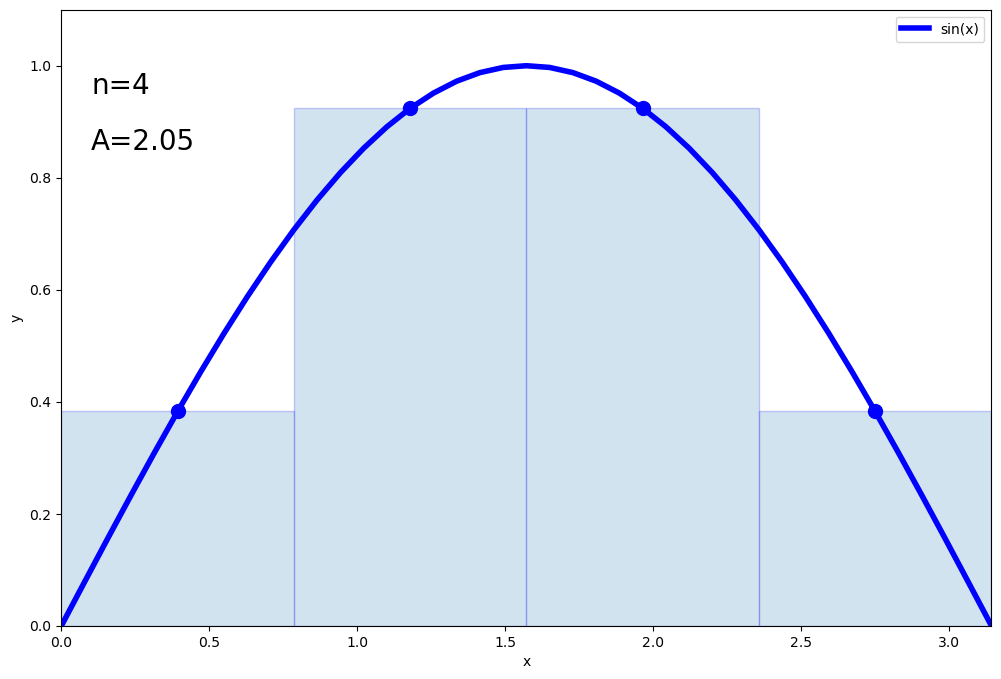

In [5]:
plot(n=4)

Finally, add the `interactive` module for playing:

In [6]:
# call interactive module
w = dict(
n=widgets.IntSlider(min=1,max=40,step=1,value=2,description='n')
)

output = widgets.interactive_output(plot, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

[next >](Numerics_lab02_taylor.ipynb)